In [3]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from numpy import genfromtxt

pca3 = genfromtxt('pca3.csv', delimiter=',')
pca4 = genfromtxt('pca4.csv', delimiter=',')

Original space


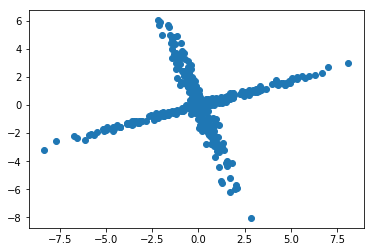

Projection by PCA


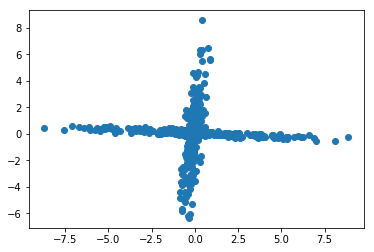

In [5]:
# Visualize original pca3 data
plt.scatter(pca3[:,0], pca3[:,1])
print("Original space")
plt.show()

#PCA of pca3 data downprojected to 2D
pca = PCA(n_components= 2)
pca.fit(pca3)
compressed_data1 = pca.fit_transform(pca3)

# Visualize compressed pca3 data
plt.scatter(compressed_data1[:,0], compressed_data1[:,1])
print("Projection by PCA")
plt.show()

In [6]:
# The variance in the data explained by 2 principal components, which equals
# the whole set of features in the data. 
print("% of variance in pca3 explained by PCA", 
      pca.explained_variance_ratio_.cumsum())

% of variance in pca3 explained by PCA [ 0.593217  1.      ]


Original space


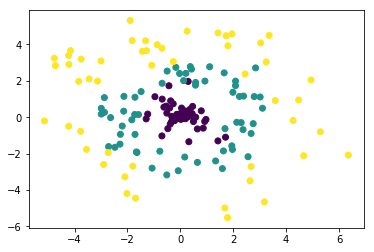

Projection by PCA


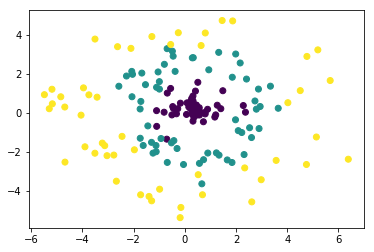

In [7]:
# Visualize original pca4 data
plt.scatter(pca4[:,0], pca4[:,1], c= pca4[:,2])
print("Original space")
plt.show()

#PCA of pca4 data downprojected to 2D
pca = PCA(n_components= 2)
pca.fit(pca4)
compressed_data2 = pca.fit_transform(pca4)

# Visualize compressed pca4 data
plt.scatter(compressed_data2[:,0], compressed_data2[:,1], c= pca4[:,2])
print("Projection by PCA")
plt.show()

In [8]:
# The variance in the data explained by 2 principal components, which equals
# the whole set of features in the data. 
print("% of variance in pca4 explained by PCA", 
      pca.explained_variance_ratio_.cumsum())

% of variance in pca4 explained by PCA [ 0.51239992  0.93998708]


The variance explained by PCA for pca3 data if only the 1st_pc is use would be ~59%, but when the 1st and 2nd principal components are combined, the PCA would explain 100% of the variance in the data. This makes sense, since the number of principal components we used equals the number of features in the dataset. Whereas for pca4 dataset, there're 3 features and we only used 2 prinicipal components to explain the variance in the data. Which resulted in a slight increase in information loss, in comparison to PCA applied to pcs3 dataset. So for pca4, using only the 1st_pc would explain ~51% of variance, and when combined with the 2nd_pc we get to ~94% of the total vaiance in the data.  

Projection of pca3 by KPCA, Sigmoid kernel


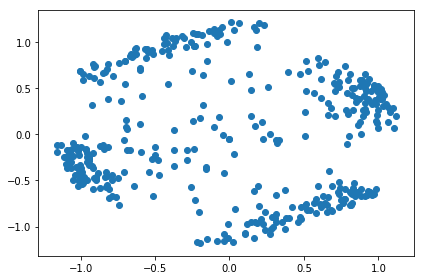

Projection of pca3 by KPCA, rbf kernel


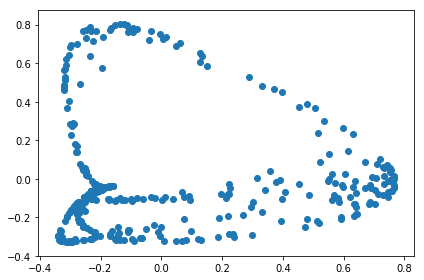

In [9]:
## Define a function to apply kernelPCA for pca3
def kpca3(x, n_components, kernel, coef0, degree, gamma, 
                   fit_inverse_transform):
    pca = KernelPCA(n_components, kernel, coef0, degree, gamma, 
                    fit_inverse_transform)
    pca.fit(x)
    compressed_x = pca.transform(x)
    plt.scatter(compressed_x[:,0], compressed_x[:,1])
    plt.tight_layout()
    

# I've tried many different parameters, but the only parameter that seems to
# make a visible difference is the choice of kernel. So I decided to keep all 
# the 4 parameters fixed, and only change the kernel type, to make a better 
# judgement of which kernel works best. 

# Visualize pca3 data after applying kernelPCA
# Sigmoid kernel
kpca3(pca3, 2, "sigmoid", 1, 3, 0.5, False)
print("Projection of pca3 by KPCA, Sigmoid kernel")
plt.show()
# Gaussian (rbf) kernel
kpca3(pca3, 2, "rbf", 1, 3, 0.5, False)
print("Projection of pca3 by KPCA, rbf kernel")
plt.show()

Projection of pca4 by KPCA, Sigmoid kernel


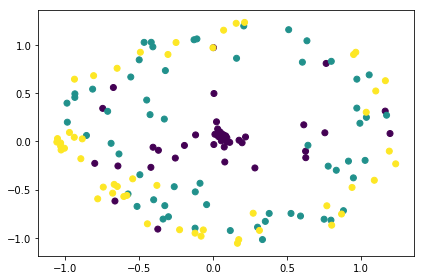

Projection of pca4 by KPCA, rbf kernel


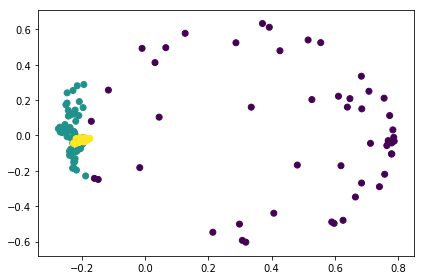

In [10]:
## Define a function to apply kernelPCA for pca4
def kpca4(x, n_components, kernel, coef0, degree, gamma, 
                   fit_inverse_transform):
    pca = KernelPCA(n_components, kernel, coef0, degree, gamma, 
                    fit_inverse_transform)
    pca.fit(x)
    compressed_x = pca.transform(x)
    plt.scatter(compressed_x[:,0], compressed_x[:,1], c=x[:,2])
    plt.tight_layout()
 
  #Visualize pca3 data after applying kernelPCA
# Sigmoid kernel
kpca4(pca4, 2, "sigmoid", 1, 3, 0.33, False)
print("Projection of pca4 by KPCA, Sigmoid kernel")
plt.show()
# Gaussian (rbf) kernel
kpca4(pca4, 2, "rbf", 1, 3, 0.33, False)
print("Projection of pca4 by KPCA, rbf kernel")
plt.show()

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without using a kernel? For which kind of data do you observe them?

Advantages of KPCA compared to PCA: generally, it's the best method for non-linearly separable data, like in the case for pca4 dataset -the Gaussian kernel looks like a better parameter choice for this dataset in comparison to the Sigmoid kernel. On the other hand, KPCA doesn't seem to make much of a difference for pca3 dataset in comparison to PCA. 

Disadvantages of KPCA compared to PCA: the high number of parameter choice is the clear disadvantage of KPCA method. 